# 텐서 다루기 기초

In [7]:
import tensorflow as tf

In [8]:
# 1. 기본텐서 만들기 
tensor = tf.constant(3)
print(tensor)

tf.Tensor(3, shape=(), dtype=int32)


In [9]:
tf.constant([3, 4, 5]) # 상수 (<-> 변수)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 4, 5], dtype=int32)>

In [10]:
tf.constant([3, 4, 5]).numpy() 

array([3, 4, 5], dtype=int32)

In [11]:
tf.constant([[1, 2, 3],[3, 4, 5]]) # shape : 행렬의 크기

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [3, 4, 5]], dtype=int32)>

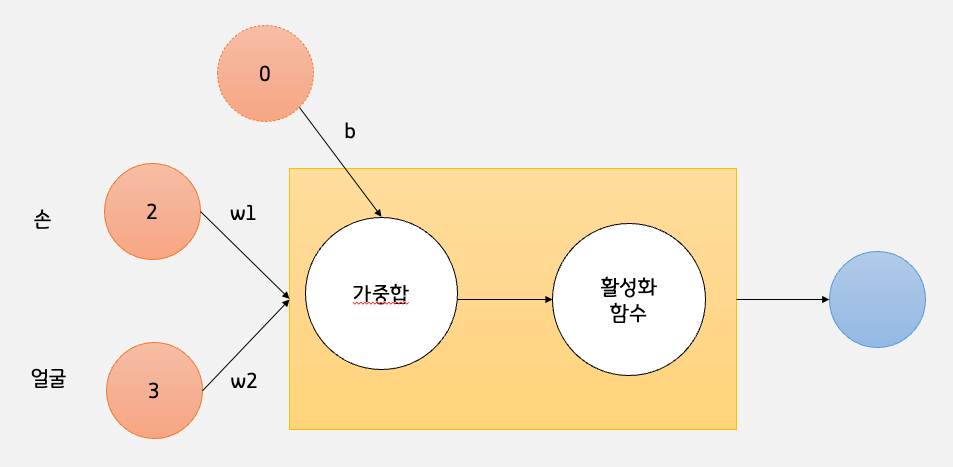

In [12]:
hand = 2
face = 3
w1, w2, b = 1, 1, 0 # 초기 weight 설정 (내 마음대로)
z = w1*hand + w2*face + b # 선형 모델
z

5

- numpy로 내적하기 (퍼셉트론)

In [13]:
import numpy as np 

X = np.array([hand, face, 1]) # bias는 기본 1
W = np.array([[w1, w2, b], [w1, w2, b]])

np.dot(X, W.T) # Transpose와 같이 차원의 방향이나 크기는 평소에 습관적으로 체크!

array([5, 5])

- tensorflow로 내적하기 (퍼셉트론)

In [16]:
import tensorflow as tf
X_tensor = tf.constant([[hand, face, 1]])
W_tensor = tf.constant([[w1, w2, b]])
print(X_tensor.shape, W_tensor.shape, tf.transpose(W_tensor).shape)

X_tensor@tf.transpose(W_tensor) # 내적 1
                                # @ : SVD 할 때 행렬 곱에서 썼던 연산자

(1, 3) (1, 3) (3, 1)


<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[5]], dtype=int32)>

- <중요>   tf.matmul()

In [17]:
# matrix multiply : 행렬 곱
tf.matmul(X_tensor, W_tensor, transpose_b = True) # output --> matrix (2D Tensor)

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[5]], dtype=int32)>

In [18]:
X_tensor = tf.constant([2, 3, 1])
W_tensor = tf.constant([w1, w2, b])

tf.tensordot(X_tensor, W_tensor, axes=1) # output --> 스칼라 (0D Tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [20]:
v0 = tf.Variable([3, 4]) # 기본 int32
v0

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([3, 4], dtype=int32)>

In [19]:
# variable은 모델 parameter로 많이 사용 --> float로 설정
v1 = tf.Variable([3, 4], dtype=tf.float32)
v1

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([3., 4.], dtype=float32)>

### Rank와 Shape

In [21]:
a = tf.constant(10)
a_float = tf.constant(10.)
b = tf.constant(5, dtype=tf.float32) # tf.constant(5.) 과 동일
c = tf.constant([1., 2.])
d = tf.constant([[1., 2.], [3., 4.]])

In [22]:
a

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [23]:
a_float

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [24]:
# 선형대수학 rank : 선형 독립인 열들의 최대 개수
tf.rank(a), tf.rank(b), tf.rank(c), tf.rank(d)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

In [25]:
a.shape, b.shape, c.shape, d.shape

(TensorShape([]), TensorShape([]), TensorShape([2]), TensorShape([2, 2]))

### Operator

In [26]:
# 형변환 cast 
a = tf.cast(a, tf.float32) # int --> float, float32 --> float64, float32 --> float16 등 변환 가능
a 

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [28]:
a + b, tf.add(a, b) # 모델 내부에서는 gradient 추적이나 모델 최적화를 위해서 tf.add()를 사용하는 것 추천

(<tf.Tensor: shape=(), dtype=float32, numpy=15.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=15.0>)

In [29]:
a - b , tf.subtract(a, b)

(<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>)

In [30]:
d/a, tf.divide(d, a)

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.1, 0.2],
        [0.3, 0.4]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.1, 0.2],
        [0.3, 0.4]], dtype=float32)>)

In [31]:
a*b, tf.multiply(a, b) 

(<tf.Tensor: shape=(), dtype=float32, numpy=50.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=50.0>)

In [32]:
# 딥러닝에서 자주 사용되는 중요 operator
# 1. add() & sub() 2. multiply() : element 곱 3. matmul() : 행렬 곱

In [37]:
c = tf.constant([1, 2]) # int
d = tf.constant([3., 4.]) # float(부동소수)
c + d

InvalidArgumentError: ignored

In [38]:
print(d + tf.cast(c, dtype=tf.float32)) # float형 끼리 계산
print(c + tf.cast(d, dtype=tf.int32))  # int형 끼리 계산

tf.Tensor([4. 6.], shape=(2,), dtype=float32)
tf.Tensor([4 6], shape=(2,), dtype=int32)


In [35]:
c = tf.cast(c, dtype=tf.float32) 
c + d

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [39]:
e = tf.constant([[1, 2, 3], [4, 5, 6]])
e.shape

TensorShape([2, 3])

In [42]:
tensor = tf.range(3, 33, 5) # start, end + 1, step
tensor.numpy()
# tf.reshape(tensor, [-1, 1, 30])

array([ 3,  8, 13, 18, 23, 28], dtype=int32)

In [43]:
# reshape 안의 -1은 가변적으로 정해짐을 의미
tf.reshape(e, [3, -1]) 

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

### Sequence Data

In [44]:
tf.range(1., 33., 3)

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.],
      dtype=float32)>

In [45]:
tf.linspace(1.0, 10.0, 10) # start, end, div

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>

In [46]:
tf.zeros((3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [47]:
tf.ones((2, 2), dtype = tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]], dtype=int32)>

### reduce_*

In [48]:
# 0, 30, (2, 3, 5), dtype=tf.float32

e = tf.reshape(tf.range(0., 30.), [2, 3, 5])
e

<tf.Tensor: shape=(2, 3, 5), dtype=float32, numpy=
array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]],

       [[15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.]]], dtype=float32)>

In [49]:
tf.reduce_sum(e)

<tf.Tensor: shape=(), dtype=float32, numpy=435.0>

In [50]:
tf.reduce_sum(e, axis=2) # axis=2 : [2,3,5] 에서 5가 있는 축을 말함

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 10.,  35.,  60.],
       [ 85., 110., 135.]], dtype=float32)>

In [51]:
tf.reduce_sum(e, axis=2, keepdims=True) # keepdims : 계산 후 차원 유지

<tf.Tensor: shape=(2, 3, 1), dtype=float32, numpy=
array([[[ 10.],
        [ 35.],
        [ 60.]],

       [[ 85.],
        [110.],
        [135.]]], dtype=float32)>

### Random

In [52]:
a = tf.random.normal((3, 3)) # normal : 정규분포로 random 수 생성
a

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.5274319 ,  0.21160878,  2.0387483 ],
       [ 0.2980545 ,  1.4614197 , -1.9578587 ],
       [-0.84938574, -2.369637  , -1.6201843 ]], dtype=float32)>

In [53]:
b = tf.random.uniform((4, 4)) # uniform : 0~1 사이에서 균등하게 난수 생성
b

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.5019126 , 0.6506288 , 0.71783733, 0.35365963],
       [0.9926164 , 0.5748186 , 0.36134803, 0.84105897],
       [0.27204454, 0.5468446 , 0.50328565, 0.7707231 ],
       [0.92732906, 0.37793064, 0.94464004, 0.08317423]], dtype=float32)>

### 간단한 모델

In [54]:
# 6월 모의고사, 9월 모의고사 --> 수능  점수 예측

# data 
mon6, mon9, final = 85., 100., 95.

# 가설  : final = w1*mon6 + w2*mon9 + b 

# parameter 정의
# 초기 weight 설정
w1 = tf.Variable(0.1)
w2 = tf.Variable(0.2)
b = tf.Variable(-0.5)

# Cost Function
def myCost():
    # 예측값
    y_pred = w1*mon6 + w2*mon9 + b 

    # Loss (실제값 - 예측값)^2 
    error = final-y_pred
    loss = tf.square(error) # mse
    return loss 

# optimzer 
opt = tf.keras.optimizers.Adam(learning_rate = 0.1) # 제일 기본적인 것은 lr을 우선적으로 고려
                                                    # lr이 크면 --> 학습이 빠르지만, 최적값을 지나 발산할 수 있다.
EPOCH = 100
for i in range(EPOCH):
    opt.minimize(myCost, var_list = [w1, w2, b])
    print(f"Epoch : {i} - Loss : {myCost().numpy()} - w1 : {w1.numpy()} - w2 : {w2.numpy()} - b : {b.numpy()}")

Epoch : 0 - Loss : 2342.518310546875 - w1 : 0.20000232756137848 - w2 : 0.3000023066997528 - b : -0.39999768137931824
Epoch : 1 - Loss : 911.4864501953125 - w1 : 0.2978987693786621 - w2 : 0.39789873361587524 - b : -0.3021012544631958
Epoch : 2 - Loss : 166.1922149658203 - w1 : 0.39090561866760254 - w2 : 0.4909055829048157 - b : -0.20909442007541656
Epoch : 3 - Loss : 7.277340888977051 - w1 : 0.4747186303138733 - w2 : 0.5747185945510864 - b : -0.125281423330307
Epoch : 4 - Loss : 242.10948181152344 - w1 : 0.5438702702522278 - w2 : 0.6438702344894409 - b : -0.056129761040210724
Epoch : 5 - Loss : 615.16162109375 - w1 : 0.593561589717865 - w2 : 0.6935615539550781 - b : -0.006438437849283218
Epoch : 6 - Loss : 905.072265625 - w1 : 0.6219592690467834 - w2 : 0.7219592332839966 - b : 0.02195926196873188
Epoch : 7 - Loss : 1004.2064208984375 - w1 : 0.6305872201919556 - w2 : 0.7305871844291687 - b : 0.030587194487452507
Epoch : 8 - Loss : 915.0398559570312 - w1 : 0.6228474974632263 - w2 : 0.7228

In [55]:
w1*mon6 + w2*mon9 + b 

<tf.Tensor: shape=(), dtype=float32, numpy=95.280914>

In [62]:
import numpy as np 
import random 

a, b = 2, -5
rng = np.random.RandomState(1)
X = 10*rng.rand(50)
y = a*X + b + rng.randn(50) # 분산 추가 

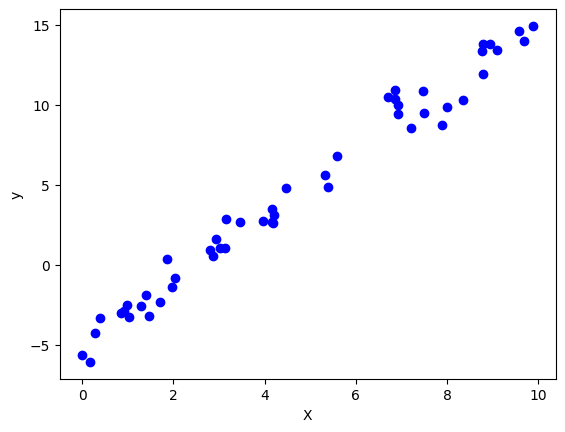

In [63]:
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [64]:
# 가중치 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# cost function
def compute_loss():
    y_pred = a*X + b
    error = y-y_pred
    loss = tf.reduce_mean(error**2) # MSE
    # loss = tf.reduce_sum(error**2) # custom한 loss / 원래는 평균을 쓰지만 sum도 OK
    return loss 

optim = tf.keras.optimizers.Adam(learning_rate = 0.01)

EPOCH = 1500
for i in range(EPOCH):
    # mse minimize
    optim.minimize(compute_loss, var_list = [a, b])

    if i % 100 == 99:
        print(f"Epoch : {i} - Loss : {compute_loss().numpy()} - a : {a.numpy()} - b : {b.numpy()}")


Epoch : 99 - Loss : 13.332270622253418 - a : 0.903810441493988 - b : 1.1148642301559448
Epoch : 199 - Loss : 9.19323444366455 - a : 1.1689363718032837 - b : 0.23809966444969177
Epoch : 299 - Loss : 6.421778678894043 - a : 1.3345307111740112 - b : -0.7000308036804199
Epoch : 399 - Loss : 4.456024646759033 - a : 1.4724998474121094 - b : -1.5306984186172485
Epoch : 499 - Loss : 3.0973687171936035 - a : 1.5896281003952026 - b : -2.2519354820251465
Epoch : 599 - Loss : 2.189796209335327 - a : 1.6884318590164185 - b : -2.867156744003296
Epoch : 699 - Loss : 1.6076959371566772 - a : 1.7704951763153076 - b : -3.3812389373779297
Epoch : 799 - Loss : 1.2511968612670898 - a : 1.8372385501861572 - b : -3.8007724285125732
Epoch : 899 - Loss : 1.0436991453170776 - a : 1.89018976688385 - b : -4.134246826171875
Epoch : 999 - Loss : 0.9293836951255798 - a : 1.9310481548309326 - b : -4.391833305358887
Epoch : 1099 - Loss : 0.8699741363525391 - a : 1.9616435766220093 - b : -4.584827899932861
Epoch : 1199

In [65]:
a,b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0168853>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-4.9334235>)

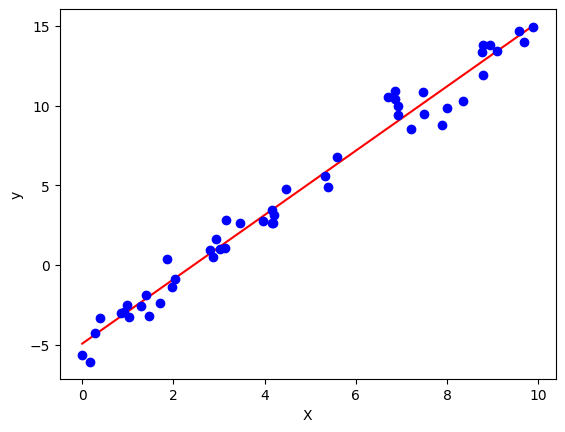

In [66]:
import matplotlib.pyplot as plt 
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다. 
plt.plot(line_x, line_y, 'r-')
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()